<h1>Task 2</h1>


<h1>About the Dataset</h1>
<p>The Titanic Dataset, particularly the training set (often referred to as "train.csv" in many tutorials), contains detailed information about a subset of the passengers aboard the Titanic. This dataset includes features that describe the passengers' demographics, socio-economic status, and other relevant information, as well as the outcome variable indicating whether the passenger survived or perished in the disaster.</p>

<h2>Features of the dataset</h2>

<p><strong>PassengerId:</strong>A unique identifier for each passenger.</p>
<p><strong>Survived:</strong>  Binary variable indicating survival (0 = No, 1 = Yes).</p>
<p><strong>Pclass:</strong>Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).</p>
   
<p><strong>Name:</strong> Full name of the passenger.</p>
<p><strong>Sex:</strong>Gender of the passenger (male/female).</p>
<p><strong>Age:</strong> Age of passenger in years. </p>
<p><strong>SibSp:</strong>  Number of siblings and spouses aboard the Titanic.</p>
<p><strong>Parch:</strong>Number of parents and children aboard the Titanic.</p>
<p><strong>Ticket:</strong> Ticket number.</p>
<p><strong>Fare:</strong> Amount of money the passenger paid for the ticket.</p>
<p><strong>Cabin:</strong> Cabin number. </p>
<p><strong>Embarked:</strong>Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).</p>


<h2>Importing libraries</h2>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<h2>Reading Datset and Validating</h2>

In [52]:
data_set = pd.read_csv('https://github.com/Seetha-2002/PRODIGY_DS_02/raw/main/Titanic_Dataset(Train).csv')
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1>About the Data</h1>

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2>Cheking for null or missing values</h2>

In [8]:
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<B>Dropping cols<B>

In [53]:
data_set.drop(columns="Cabin",axis=1,inplace=True)

<B>Filling the missing values in the Age column with the mean value and in the Embarked column with the mode value.<B>

In [54]:
data_set['Age'].fillna(data_set['Age'].mean(),inplace=True)

In [55]:
data_set['Embarked'].fillna(data_set['Embarked'].mode()[0],inplace=True)

In [56]:
data_set.isnull().sum().sum()

0

In [57]:
data_set.duplicated().sum()

0

<h2>Examining the survival rates of the passengers</h2>

In [15]:
data_set['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<h2>Visualization of Passenger Survival Rates</h2>

<b>Count Plot</b>

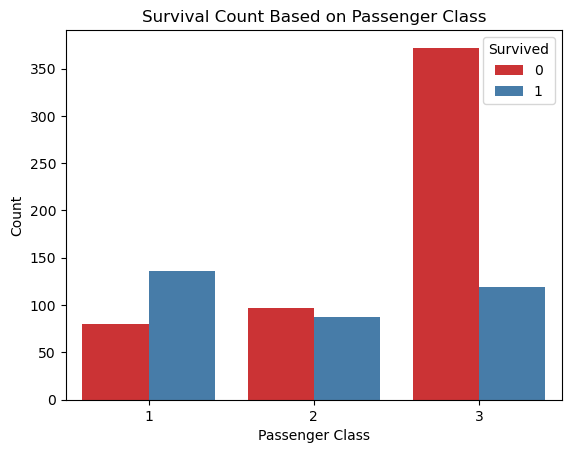

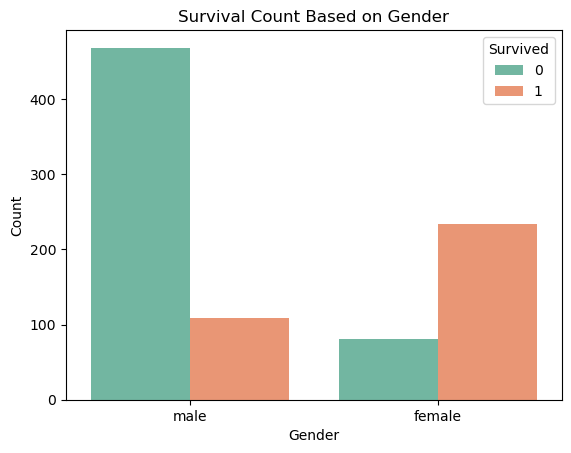

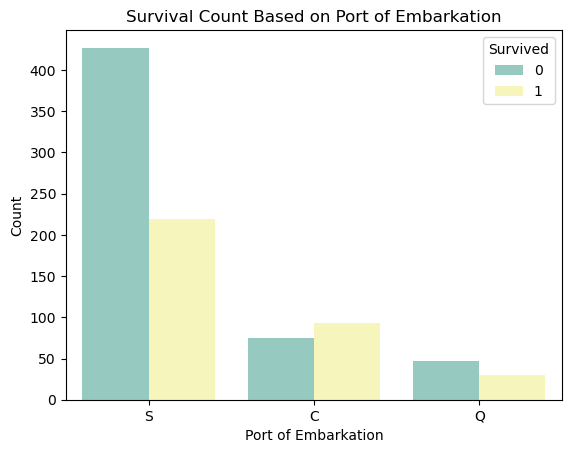

In [59]:
# Bivariate Analysis between pairs of features and Survived (Target Variable)

# Relationship between Pclass and Survived
sns.countplot(x="Pclass", hue="Survived", data=data_set, palette="Set1")
plt.title("Survival Count Based on Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# Relationship between Sex and Survived
sns.countplot(x="Sex", hue="Survived", data=data_set, palette="Set2")
plt.title("Survival Count Based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Relationship between Embarked and Survived
sns.countplot(x="Embarked", hue="Survived", data=data_set, palette="Set3")
plt.title("Survival Count Based on Port of Embarkation")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()


<b>Pie Plot</b>

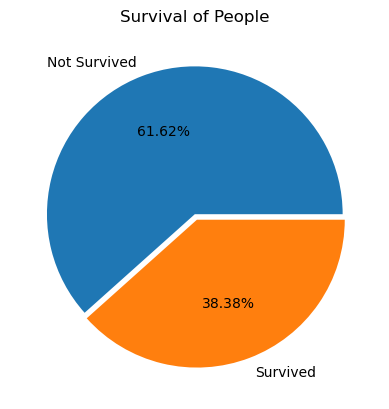

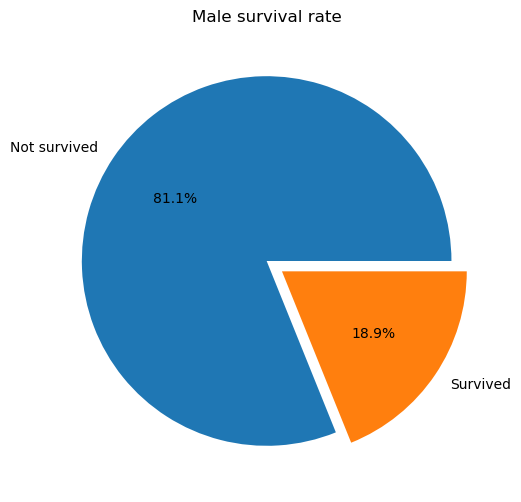

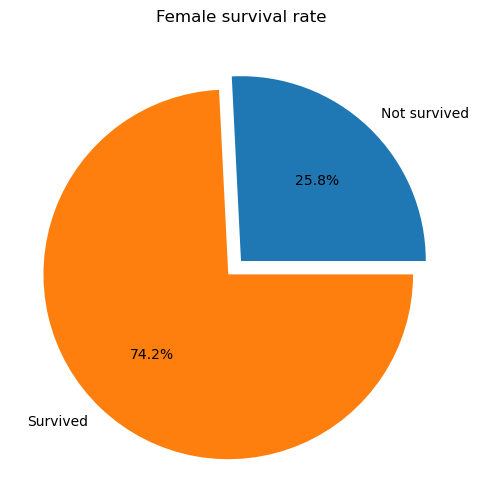

In [61]:
# total survival rate
plt.pie(data_set['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not Survived','Survived'])
plt.title("Survival of People")
plt.show()
#female survival rate
data_set[data_set['Sex'] == 'male'].Survived.groupby(data_set.Survived).count().plot(kind='pie', figsize=(8, 6), explode=[0, 0.1], autopct='%1.1f%%', labels=['Not survived', 'Survived'])
plt.ylabel('')
plt.title('Male survival rate')
plt.show()
#male survival rate
data_set[data_set['Sex'] == 'female'].Survived.groupby(data_set.Survived).count().plot(kind='pie', figsize=(8, 6), explode=[0, 0.1], autopct='%1.1f%%', labels=['Not survived', 'Survived'])
plt.ylabel('')
plt.title('Female survival rate')
plt.show()

<p><strong>Findings and Analysis:</strong></p>
    
-Females exhibit a higher survival rate than other.

<b>Box Plot and outlier detection</b>

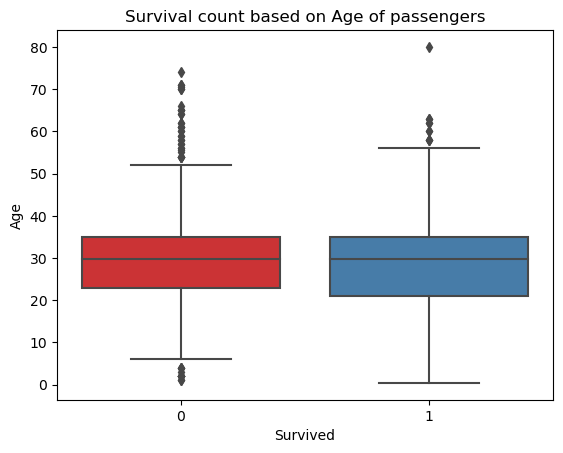

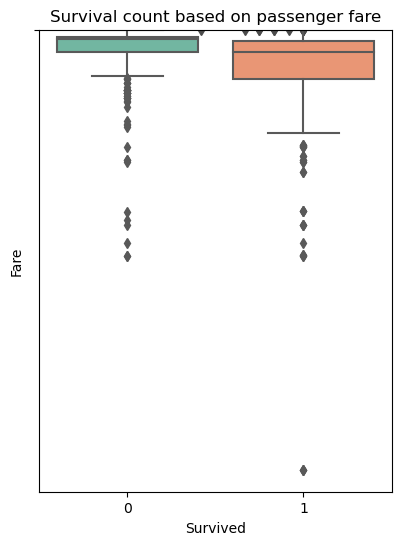

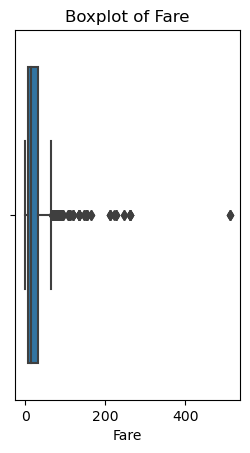

In [66]:
#For Survived and Age
sns.boxplot(x="Survived",y="Age",data=data_set,palette= "Set1")
plt.title("Survival count based on Age of passengers")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', data=data_set,palette='Set1')
plt.title('Boxplot of Age')
#For Survived and Fare
sns.boxplot(x="Survived",y="Fare",data=data_set,palette= "Set2")
plt.title("Survival count based on passenger fare")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()
plt.subplot(1, 2, 2)
sns.boxplot(x='Fare', data=data_set)
plt.title('Boxplot of Fare')
plt.show()


<b>Histogram</b>

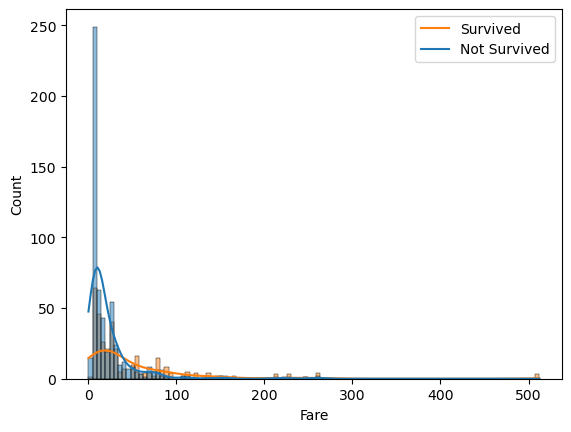

In [67]:
sns.histplot(x='Fare',hue='Survived',data=data_set,kde=True)
plt.legend(labels=['Survived','Not Survived'])
plt.show()

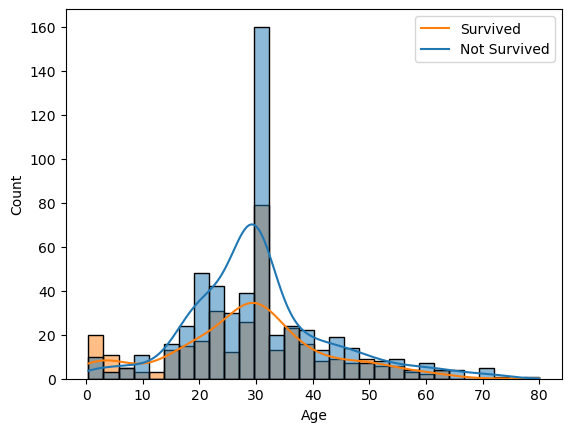

In [68]:
sns.histplot(x='Age',hue='Survived',data=data_set,kde=True)
plt.legend(labels=['Survived','Not Survived'])
plt.show()

<h2>Correlation Analysis</h2>

In [69]:
data_set.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
data_set['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

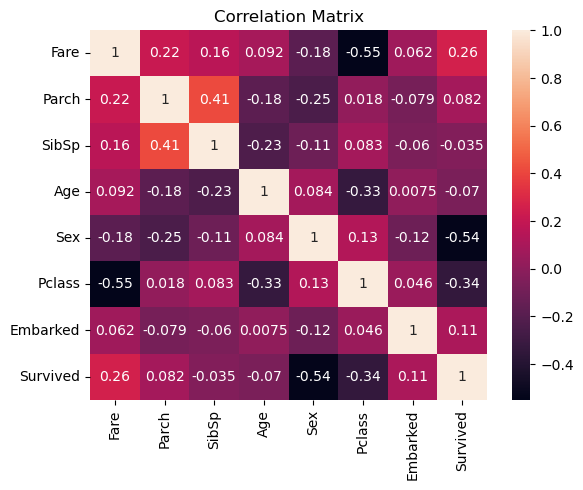

In [70]:
Df_num=data_set[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]
sns.heatmap(Df_num.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

<p><strong>Inference:</strong></p>
    
- There is a correlation between the fare, sex, passenger class (Pclass), and embarkation point (Embarked) variables with the survival outcome.

<h1><strong>Conclusion:</strong></h1>
    
<p>1. <b>Gender Disparity:</b> Females had a significantly higher survival rate compared to males, reflecting the "women and children first" protocol observed during the evacuation. This highlights societal norms of the time that prioritized the safety of women and children .</p>
<p>2. <b>Passenger Class Disparity:</b>Despite having the highest number of passengers, Class 3 had the lowest survival rate. This suggests a correlation between socio-economic status and survival, with higher-class passengers having better access to lifeboats and resources during the evacuation.</p>
<p>3. <b>Gender and Passenger Class Interaction</b>: Males from Class 3 exhibited the lowest survival rate, indicating a compounded effect of gender and socio-economic status. Male passengers in lower classes faced the highest risk of not surviving the disaster</p>
<p>4. <b>Age Factor</b>: Young adults had the lowest survival rate, which could be attributed to the prioritization of women and children during the evacuation process.</p>
<p>5. <b>Correlation with Survived Column</b>:Variables such as fare, sex, passenger class (Pclass), and embarkation point (Embarked) show significant correlations with survival outcomes, underscoring their importance in determining survival chances during the Titanic disaster.</p>


